In [1]:
#Salary_Data.csv
# location: https://mitu.co.in/datasets

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('Salary_Data.csv')

In [7]:
x=np.arange(0,10,0.25)

In [8]:
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [13]:
y_lin=x**2+56.34

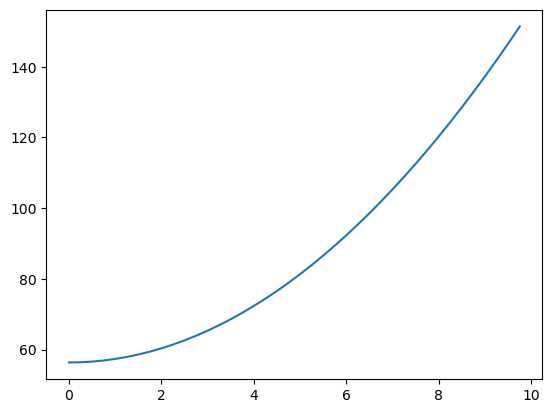

In [14]:
plt.plot(x,y_lin)

In [15]:
x=np.arange(1,11)

In [16]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x.reshape(-1,1))
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [20]:
###### Polynomial Regression

In [23]:
df=pd.read_csv('Salary_Data.csv')
x=df[['YearsExperience']]
y=df['Salary']

In [22]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
x.

In [25]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x,y)
print('Accuracy',reg.score(x,y))

Accuracy 0.9569566641435086


In [26]:
poly= PolynomialFeatures(degree=2)
x_poly= poly.fit_transform(x)

In [27]:
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [28]:
reg.fit(x_poly,y)
print('Accuracy',reg.score(x_poly,y))

Accuracy 0.956975168321065


In [29]:
# Change the Degree
poly= PolynomialFeatures(degree=4)
x_poly= poly.fit_transform(x)

In [30]:
reg.fit(x_poly,y)
print('Accuracy',reg.score(x_poly,y))

Accuracy 0.9636560599375091


In [58]:
acc=[]

In [59]:
for i in range(2,31):
    poly= PolynomialFeatures(degree=i)
    x_poly= poly.fit_transform(x)
    reg.fit(x_poly,y)
    acc.append(reg.score(x_poly,y))
    

In [60]:
len(acc)

29

In [54]:
np.max(acc)

0.9830431165773489

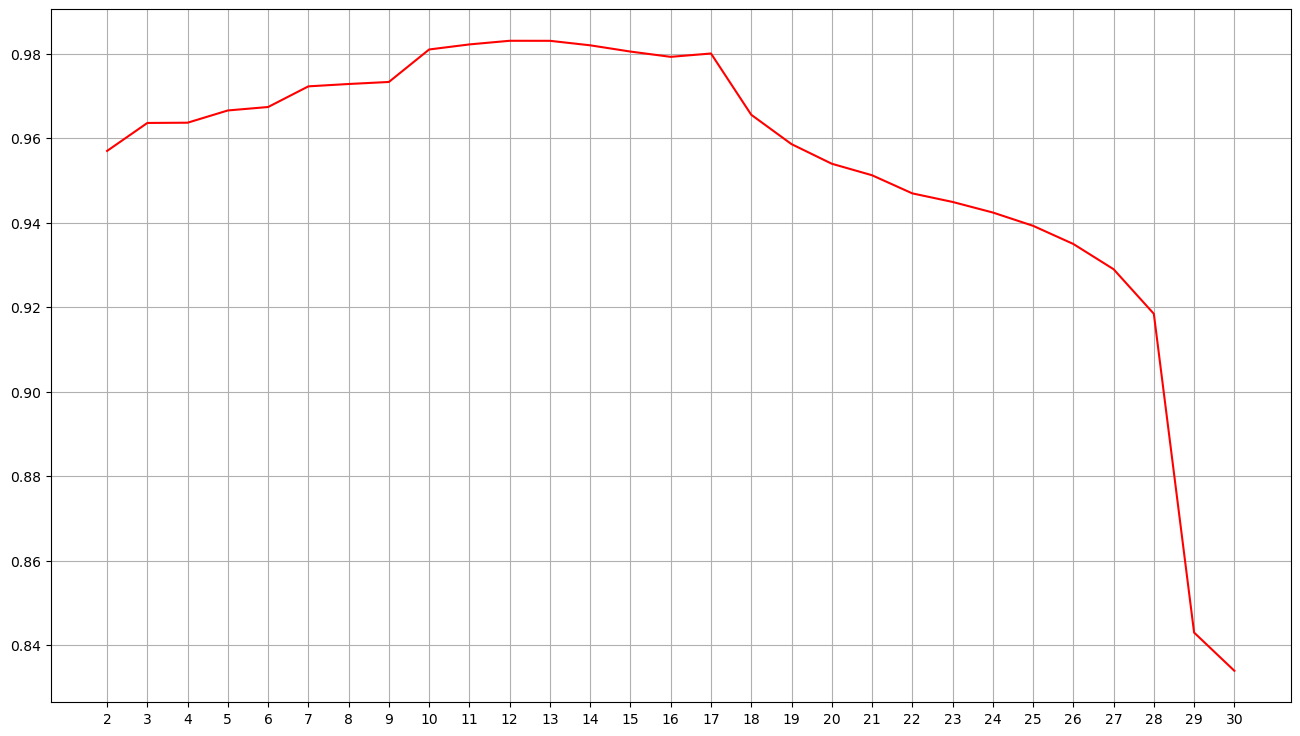

In [61]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xticks(range(2,31))
plt.plot(range(2,31), acc, color='red')

In [42]:
poly= PolynomialFeatures(degree=12)
x_poly= poly.fit_transform(x)

reg.fit(x_poly,y)
acc.append(reg.score(x_poly,y))
    

In [43]:
y_pred=reg.predict(x_poly)

In [44]:
y_pred

array([ 39857.5933389 ,  43443.06064751,  41354.43597045,  39193.96477437,
        42435.28675082,  57581.46991152,  58756.96113326,  59973.75749701,
        59973.75749701,  58569.12390035,  57737.51848173,  57554.29263663,
        57554.29263663,  57599.13735139,  60614.90639663,  67851.03437662,
        72328.93650961,  76828.72958755,  87225.14603996,  88316.66323471,
        93640.06628418,  96197.31245422, 106066.64239502, 108529.15914917,
       109046.31497192, 108812.98510742, 113177.20861816, 114966.38323975,
       122821.95581055, 122081.9029541 ])

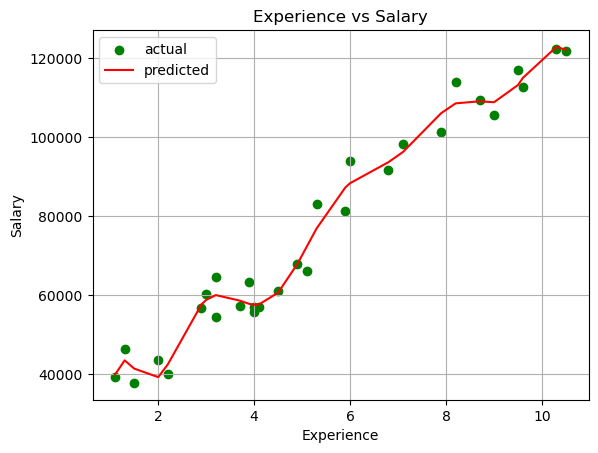

In [46]:
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.scatter(x,y, color='green', label='actual')
plt.plot(x,y_pred,color='red',label='predicted')
plt.legend()



